In [1]:
import numpy as np
import pandas as pd
import datetime 
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
start = '2012-01-01'
end = '2017-01-01'
Tesla = pd.read_csv(filepath_or_buffer = r'C:\Users\brett.ngo\Desktop\exercise\archive (1)\stocks\TSLA.csv', dayfirst= True,index_col = 0).loc[start:end]
Ford = pd.read_csv(filepath_or_buffer = r'C:\Users\brett.ngo\Desktop\exercise\archive (1)\stocks\FORD.csv', dayfirst= True,index_col = 0).loc[start:end]
Gm = pd.read_csv(filepath_or_buffer = r'C:\Users\brett.ngo\Desktop\exercise\archive (1)\stocks\GM.csv', dayfirst= True,index_col = 0).loc[start:end]

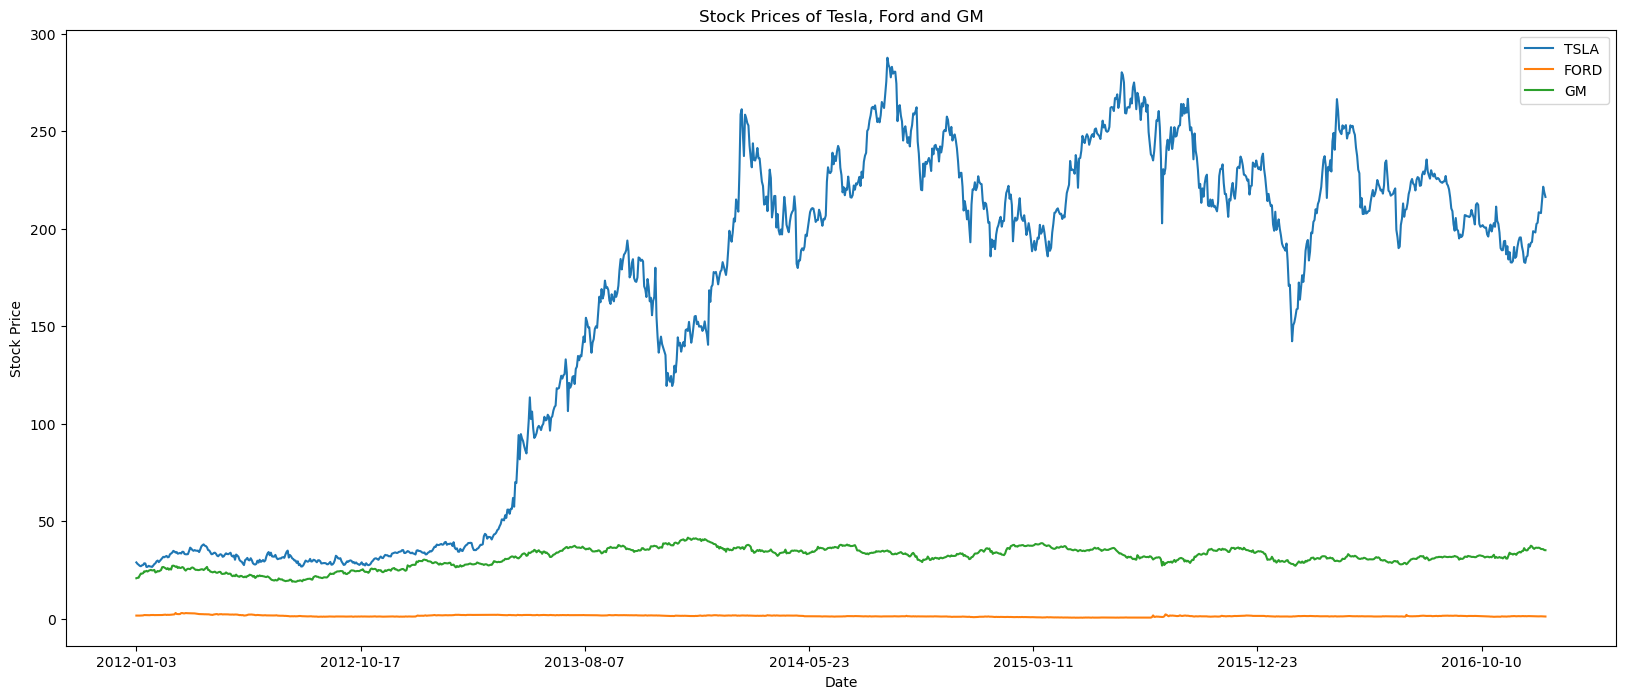

In [13]:
Tesla['Open'].plot(label='TSLA', figsize=(20,8))
Ford['Open'].plot(label='FORD')
Gm['Open'].plot(label='GM')
plt.ylabel('Stock Price')
plt.title('Stock Prices of Tesla, Ford and GM')
plt.legend()

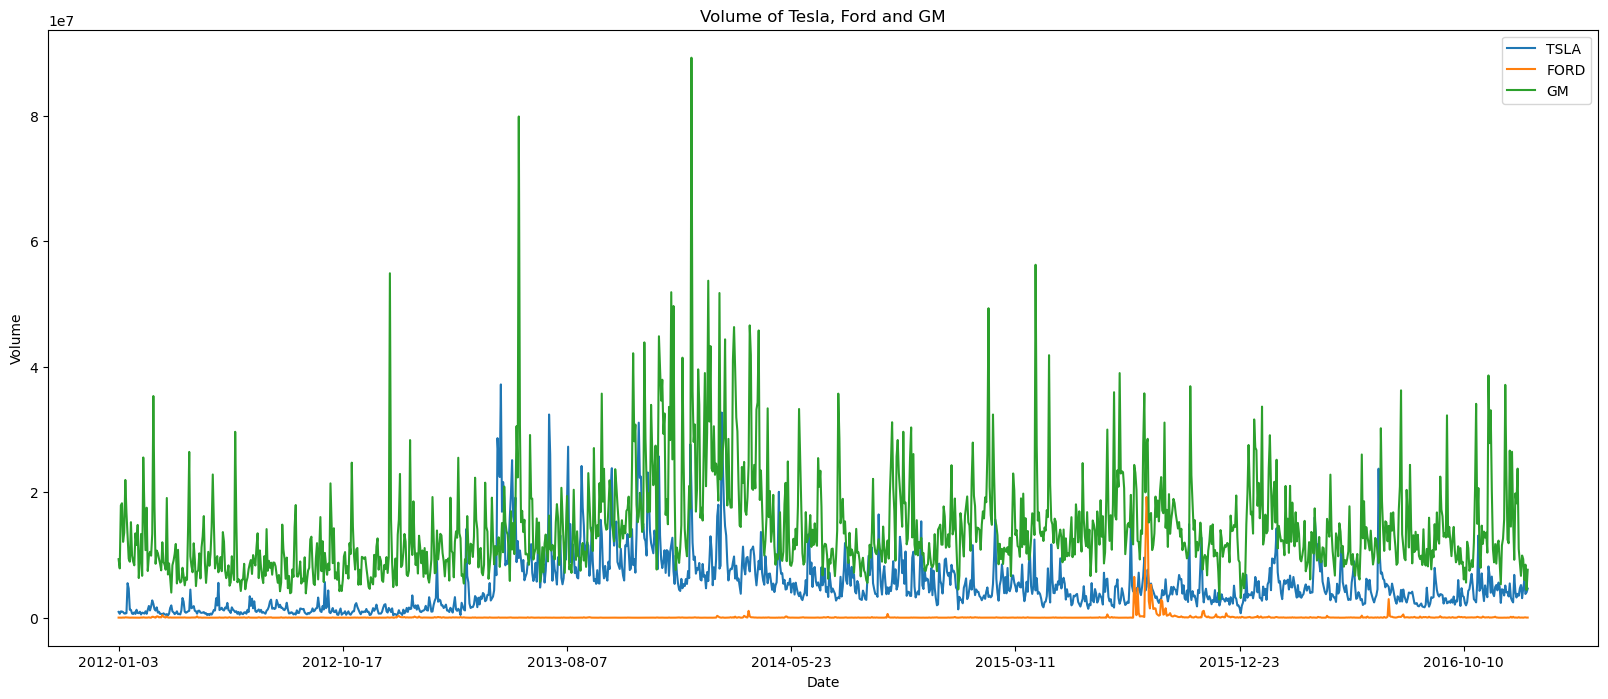

In [15]:
Tesla['Volume'].plot(label='TSLA', figsize=(20,8))
Ford['Volume'].plot(label='FORD')
Gm['Volume'].plot(label='GM')
plt.ylabel('Volume')
plt.title('Volume of Tesla, Ford and GM')
plt.legend()

In [16]:
Ford.iloc[[Ford['Volume'].argmax()]]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-26,1.32,1.92,1.32,1.81,1.81,19228200


<Axes: xlabel='Date'>

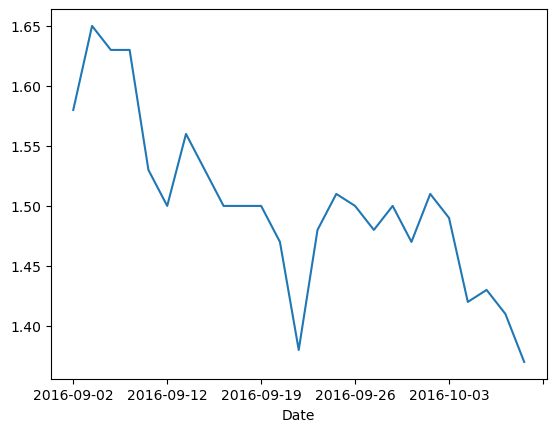

In [18]:
Ford.iloc[1175:1200]['Open'].plot()

In [35]:
Tesla['Trading Value'] = Tesla['Adj Close']*Tesla['Volume']  
Ford['Trading Value'] = Ford['Volume']*Ford['Adj Close']
Gm['Trading Value'] = Gm['Volume']*Gm['Adj Close']



In [36]:
Tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Trading Value
Date,,,,,,,
2012-01-03,28.940001,29.500000,27.650000,28.080000,28.080000,928100,2.606105e+07
2012-01-04,28.209999,28.670000,27.500000,27.709999,27.709999,630100,1.746007e+07
2012-01-05,27.760000,27.930000,26.850000,27.120001,27.120001,1005500,2.726916e+07
2012-01-06,27.200001,27.790001,26.410000,26.910000,26.910000,986300,2.654133e+07
2012-01-09,27.000000,27.490000,26.120001,27.250000,27.250000,897000,2.444325e+07


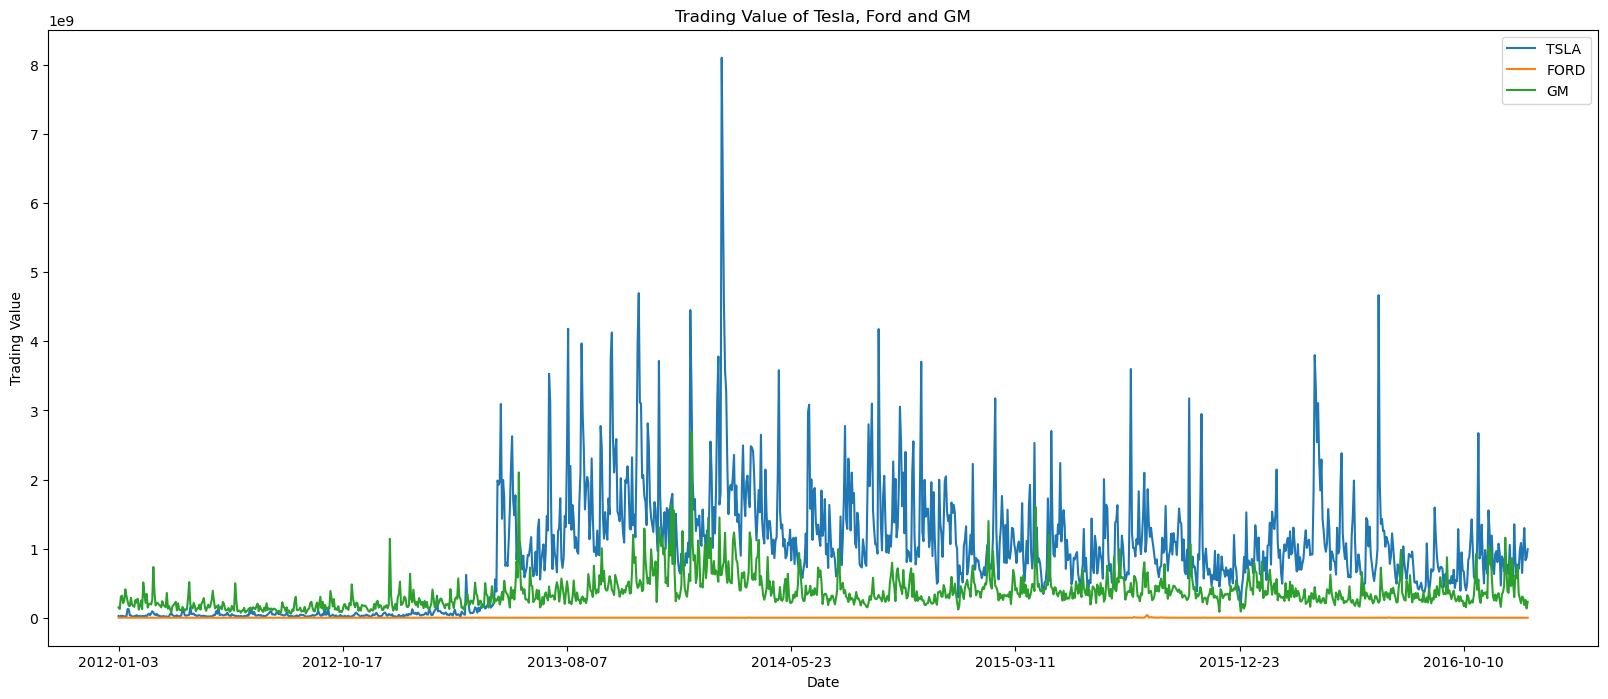

In [37]:
Tesla['Trading Value'].plot(label='TSLA', figsize=(20,8))
Ford['Trading Value'].plot(label='FORD')
Gm['Trading Value'].plot(label='GM')
plt.ylabel('Trading Value')
plt.title('Trading Value of Tesla, Ford and GM')
plt.legend()

In [38]:
Tesla['Trading Value'].argmax()

538

In [47]:
Tesla.iloc[[Tesla['Trading Value'].argmax()]]

,Open,High,Low,Close,Adj Close,Volume,Trading Value
Date,,,,,,,
2014-02-25,230.0,259.200012,228.449997,248.0,248.0,32681700,8.105062e+09


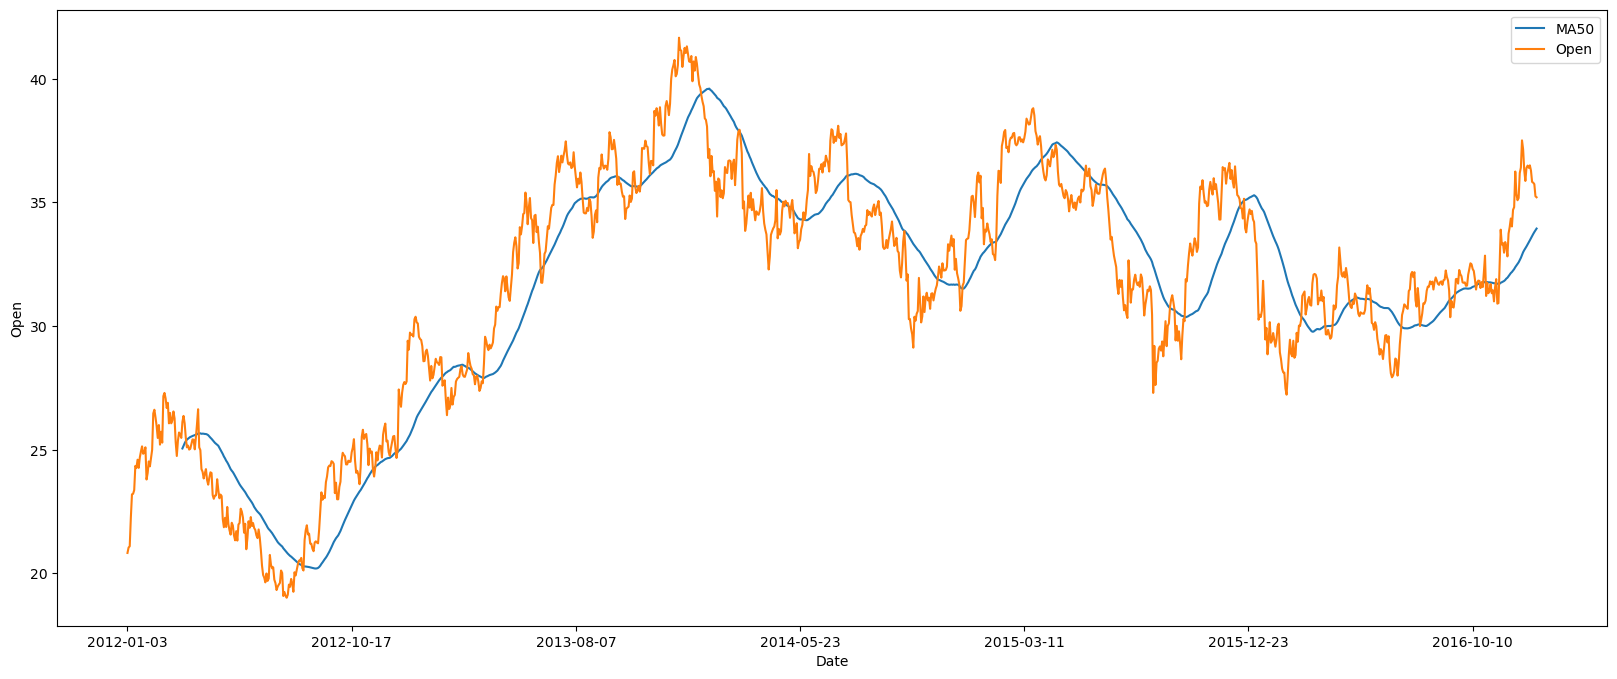

In [52]:
Gm['MA50'] = Gm['Open'].rolling(50).mean()
Gm['MA50'].plot(label='MA50',figsize =(20,8))
Gm['Open'].plot()
plt.ylabel('Open')
plt.legend()



In [53]:
from pandas.plotting import scatter_matrix

In [60]:
Open_mix = pd.concat([Tesla['Open'],  Ford['Open'],  Gm['Open']], axis=1 )
Open_mix.columns=('Tesla', 'Ford', 'Gm')
Open_mix.head()


,Tesla,Ford,Gm
Date,,,
2012-01-03,28.940001,1.69,20.830000
2012-01-04,28.209999,1.68,21.049999
2012-01-05,27.760000,1.65,21.100000
2012-01-06,27.200001,1.68,22.260000
2012-01-09,27.000000,1.72,23.200001


array([[<Axes: xlabel='Tesla', ylabel='Tesla'>,
        <Axes: xlabel='Ford', ylabel='Tesla'>,
        <Axes: xlabel='Gm', ylabel='Tesla'>],
       [<Axes: xlabel='Tesla', ylabel='Ford'>,
        <Axes: xlabel='Ford', ylabel='Ford'>,
        <Axes: xlabel='Gm', ylabel='Ford'>],
       [<Axes: xlabel='Tesla', ylabel='Gm'>,
        <Axes: xlabel='Ford', ylabel='Gm'>,
        <Axes: xlabel='Gm', ylabel='Gm'>]], dtype=object)

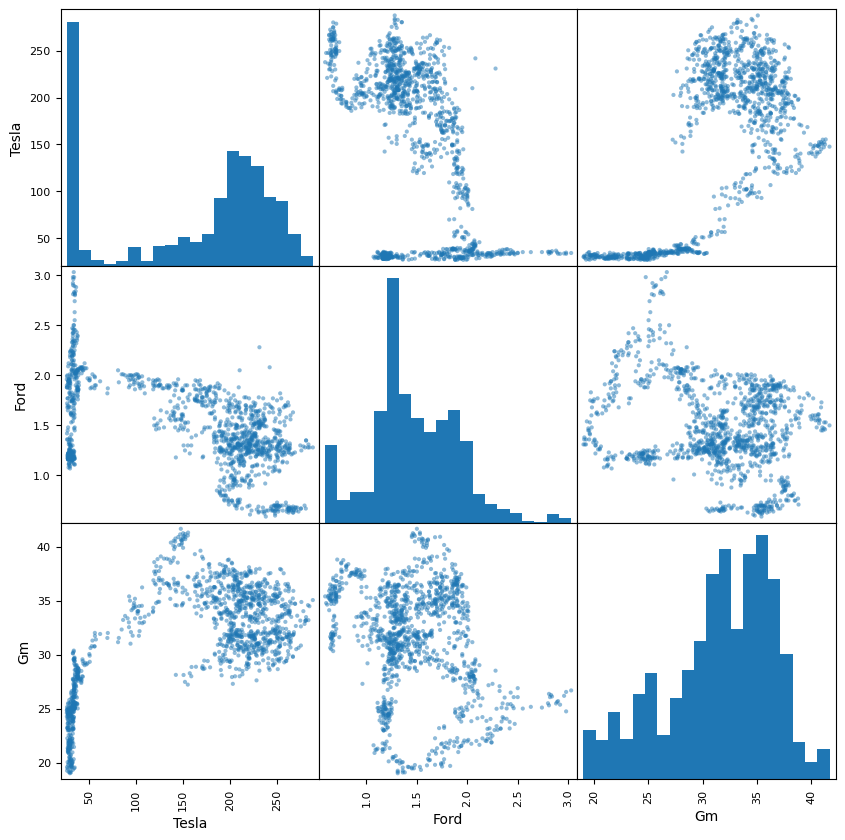

In [65]:
scatter_matrix(Open_mix,figsize=(10,10),hist_kwds={'bins':20})

In [91]:
Tesla['return']=(Tesla['Close']/Tesla['Close'].shift(1)-1)
Ford['return']=(Ford['Close']/Ford['Close'].shift(1)-1)
Gm['return']=(Gm['Close']/Gm['Close'].shift(1)-1)
Tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Trading Value,return,cumulative return
Date,,,,,,,,,
2012-01-03,28.940001,29.500000,27.650000,28.080000,28.080000,928100,2.606105e+07,NaN,NaN
2012-01-04,28.209999,28.670000,27.500000,27.709999,27.709999,630100,1.746007e+07,-0.013177,0.986823
2012-01-05,27.760000,27.930000,26.850000,27.120001,27.120001,1005500,2.726916e+07,-0.021292,0.965812
2012-01-06,27.200001,27.790001,26.410000,26.910000,26.910000,986300,2.654133e+07,-0.007743,0.958333
2012-01-09,27.000000,27.490000,26.120001,27.250000,27.250000,897000,2.444325e+07,0.012635,0.970442


<Axes: >

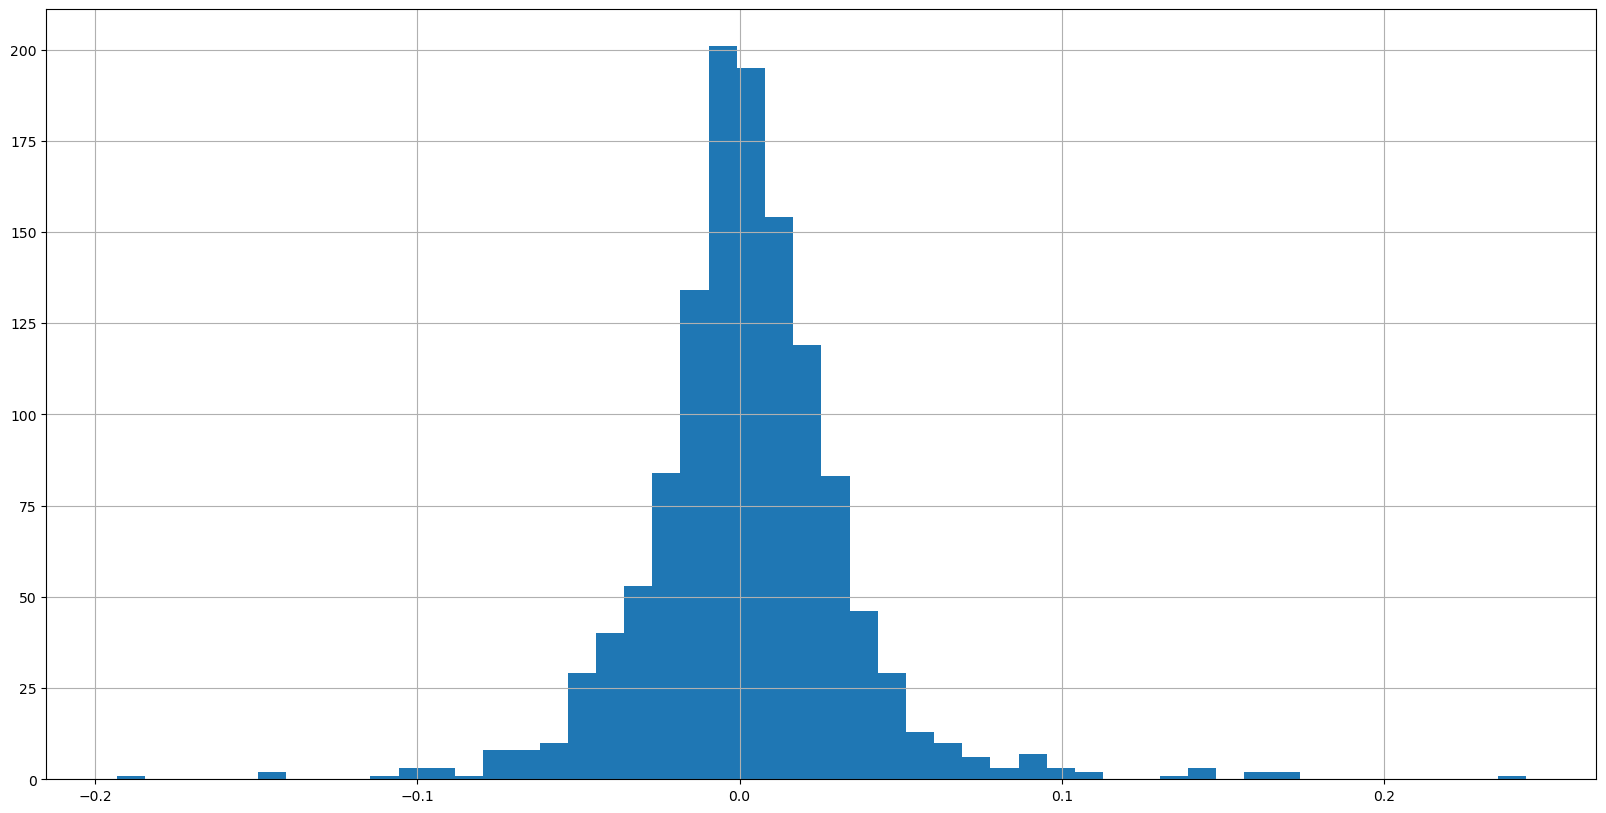

In [92]:
Tesla['return'].hist(bins = 50, figsize = (20,10))

In [94]:
Tesla['cumulative return'] =(1+ Tesla['return']).cumprod()
Ford['cumulative return'] = (1+Ford['return']).cumprod()
Gm['cumulative return'] = (1+Gm['return']).cumprod()



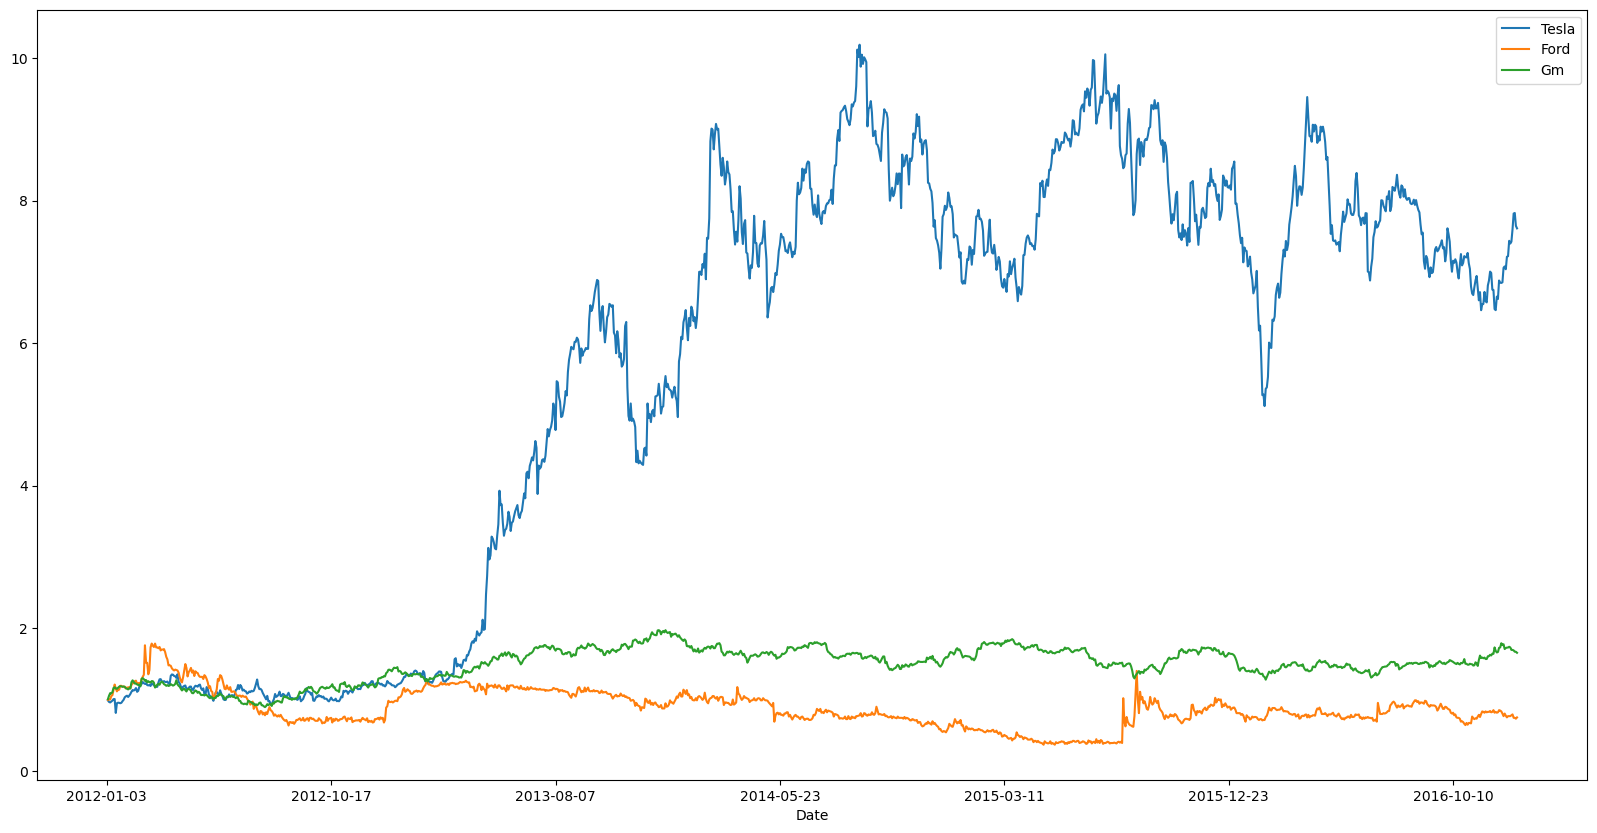

In [95]:
Tesla['cumulative return'].plot(label = 'Tesla',figsize =(20,10))
Ford['cumulative return'].plot(label = 'Ford')
Gm['cumulative return'].plot(label = 'Gm')
plt.legend()
plt.show()
